## Versions
Facility Location Model Versions:
* V1: Includes objective: transport costs
* V2: Includes allocation of locations to supply hubs
* V3: Includes objective: opening costs
* V4: Simplification of allocation matrix: - <b>Not Tested yet</b>
    * All Facility locations are allocated to closest supply point
    * All Demand points are allocated to closest FL if within max. covering range 

EMA & Platypus optimisation Versions:
* V1: includes optimisation via Platypus
* V2: included model completely in ema_workbench environment
* V3: Working single run EMA
* V4: Implemented use of kwargs: Levers and case instantiation. Case is now instantiated outside model, by ema uncertainties and ema constant 

Documentation in Jupyter Notebook:
* V1: Added linear programming model in formulas
* V2: Clean and reorganise notebook

# TODO

TODO: Organise this to 1FLM, 2EMA,3Doc

Choices:
- Capacitated vs uncapacitated?
- Endogenous vs exogenous number of facilities each optimisation step 
    - each increment: exogenous
    - Full network: endogenous


## FLM:
- Formulate objective of social cost (or deprivation costs) mathematically

## Python Implementation & EMA:
- Implement all objectives

## DOC:

- allocation: make sure all FL are connected to a SP - TODO
    - Solution 1 - SP to FL -- Found in Maharjan Hanaoka 2018:
        - <b>Allocation of hubs to supply point is directly. Not via other hubs </b>
        - Easiest and also assumed in other models. Also easy to argue for.
    - Solution 2 
        - <b>for each demand poind point: go to closest</b>
        - for each FL: Too Complicated
            - if angle to SP via FLX is larger than 90degrees: go via FLX
            - if angle to SP via FLX is smaller than 90degrees: go directly
  


Do later, or for further research:
- implement multiple types of allocation (this way, or covering tour), 


# Model XLRM

* External factors
* Levers
* Relations
* Metrics of performance

## Nomenclature

Sets:
- $I$: Demand Points
- $J$: Temporary Distribution Centres (FL)
- $K$: Supply Points
- $T$: Time Periods
- $N$: Nodes : $I \cup J \cup K$

Decision Variables:
- $Xj$: Vector of binary decision variables indicating whether FL j is opened (1) or closed (0)

Parameters: TODO: Make distinction between Exogenous and Endogenous
- $Allocated_{i,j} : A_{i,j}$ : binary value indicating whether DP i is allocated to FL j
- $Allocated_{j,k} : A_{j,k}$ : binary value indicating whether FL j is allocated to SP k
- $Demand_i$ : Demand at demand point i  
- $Distance_{n_1,n_2}$ : Distance between two nodes
- $Supply_{i,j}$ : Supply from FL j to DP i
- $Supply_{j,k}$ : Supply from SP k to FL j
- $DT_{i,j}$ : Distribution Times between DP i and FL J
- $DT_{j,k}$ : Distribution Times between FL j and SP k
- $Unit\_transportation\_costs$ : Costs for transporting one unit of goods

Matrices:
- Distance matric with all distances between all nodes (i,j and k)
- Allocations matrix with all binary values of allocation for all nodes (i,j and k)
- ?Supply matrix? - Most relevant to capacitated system
- Distribution Times (i,j,k)

## External Factors: Define model

- Typography
- disruptions
- demand landscape
- segmented population

## Levers 

Decision variables:
-  Vector of potential locations which will be deployed as temporary logistic hub

## Relations 




## Assumptions
###### Uncapacitated
- no restrictions on supply from k to j, or j to i

###### Allocation of DP to FL
Choice:<br>
1. Demand points are assigned to closest operational hub (Gutjahr2016: Typically it's supposed that beneficiaries walk to the nearest DC) TODO:Update: FL to DP is by light truck
2. Allocation of demand points to hubs is optimised with the allocation of demand point to hub being a binary decision variable (0 or 1), such as in Maharjan&Hanaoka2018.
3. Via a lower-level user-equilibrium, which takes both distance as expected supply in account, as proposed by Gutjahr 2016

Option 1 is chosen for multiple reasons. First, it will significantly reduce runtime, which is very welcome looking at the extensive computational experiments planned with the model. Second: beneficiaries choose between different hubs, regardless of coordinated allocation, TODO:Update: FL to DP is trucks not people. For this study it's assumed that beneficiaries walk towards the nearest hub. Gutjahr2016, make a more realistic option for capacitated problems, but since this research considers an uncapacitated problem , their solution is irrelevant.


<b>Regarding maximum covering distance:</b><br>
Some demand points are located too far from hubs to be supplied with relief aid. Therefore the assumption is made that there is a maximum distance for hubs to cover demand points.


###### Allocation of FL to Supply Points
- Hubs (FL) are assigned to closest supply point

## Metrics of performance

Make table with different objectives:

|nr|Objectives|Formula|Type|?Expected effect?|
|-|||||
|1|Minimise Costs|$x+x$|Efficiency| minimise distances,<br> minimise number of FLs|

### Objective Function 1: Minimise Total Costs - Efficiency

Total costs include a fixed costs for opening Facility Locations, Transportation costs from Supply Points to Facility Locations and Transportation costs from Facility Locations to Demand Points

Maharjan, R., & Hanaoka, S. (2018). A multi-actor multi-objective optimization approach for locating temporary logistics hubs during disaster response. Journal of Humanitarian Logistics and Supply Chain Management, JHLSCM-08-2017-0040. https://doi.org/10.1108/JHLSCM-08-2017-0040

#### Total opening costs Facility Locations

$$\sum_{j} Fixed opening costs * Xj $$

##### Fixed opening costs

Associated with:
- the initial investment for the temporary distribution centre
- procurement cost
- cost of leasing land
based on Maharjan&Hanaoko2018

#### transportation costs

$$Transportation\_costs\_SP\_FL=\sum_{FL} distance_{SP,FL} * unit\_distance\_costs * Supply_{j,k}$$
$$Transportation\_costs\_FL\_DP=\sum_{DP} distance_{FL,DP} * unit\_distance\_costs * Supply_{i,j}$$

Calculates the costs of transportation between all facility locations to all supply and demand points 

<b>Assumptions: / Constraints:</b><br>
- Each demand point has only one temporary distribution centre (closest)
- Each temporary distribution centre has only one supply point (closest)

<b>TODO</b>: Renew Formula, based on model and Maharjan&Hanaoka2018

### Objective Function 2: Minimise Total Uncovered Demand - Effectiveness

- Uncapacitated demand
- Allocation as endogenous variable

Formula based on MaharjanHanaoka2018

$$
uncovered\_demand = \sum_{I} demand_{i} - \sum_{I} \sum_{J} supply_{i,j}
$$

Relation: <br>
$ \sum_i \sum_j supply_{i,j} = \sum_j \sum_k Supply_{j,k}$

supply FL j to DP i is equal to demand i if allocated to FL j: <br>
$supply_{i,j} = A_{i,j} * demand_i  $

### Objective Function 3: Minimise Uncovered Demand Points - Equity

Make sure all areas are covered --> minimise number of uncovered demand points --> will select FL that covers most demand points (also if demand at these demand points is very small)

Minimise: 

$$ \sum_{i} \sum_{j} A_{i,j} $$

### Objective Function 4: Minimise Total Distribution Times - Effectiveness
Requires:
- Allocation

Given that:
- Some DP are allocated, some DP are unallocated.
- unallocated based on distance = irrelevant here
- FLs are uncapacitated

Assumptions on scope, simplifications from Bozorgi-AmiriKhorsi2016:
- No optimised between facility locations and demand points. Each demand point has their own transportation directly from and to the temporary distribution centre. This might reflect realistic situations, because the light trucks might not have enough capacity to first bring relief supplies to one demand point and then the next. It first has to fill the truck with new supplies from the distribution centre. 
- No optimised choice of vehicles. No different travel modes

Similar to minimise costs, but different
Two options:
1. Divided per demand -- 
2. not divide per demand -- effectiveness? - But then it chooses closest to city. and avoids covering larger cities if FL is a little further away.

Minimise:
$$ Total Distribution Times = \sum_{I} \sum_{J} \sum_{K} \frac { DT_{i,j} }{Supply_{i,j}} + \frac { DT_{j,k} }{Supply_{j,k}} $$

Should be dependent on demand? --> no, so that smaller far away but still covered have longer times

$$\frac{1}{x}$$

### XXNOT Objective Function 5: Minimise Maximum Distribution Times - Equity

Not all DPs are allocated to FLs or SPs<br>
Only makes sense if DPs not allocated have very high max distribution times. Then measures the same as Equity: Minimise uncovered demand points

similar to minimise maximum uncovered demand, but only takes covered demand into account
Can be a better equity objective than minmax uncovered, because uncapacitated.

$Minimise: Max( DT ) $
Smaller points should have longer DBTimes than larger points. Then they are more equitably approached XX

### XXTODO? Objective Function 6: Minimise Social costs? - Equity

How is social costs calculated?

deprivation costs?


### Objective Function 8: Maximise new information - 

## Complexities of multiple objectives their related assumptions on model structure:

- capacitated vs uncapacitated:
    - Coverage:
        - Maharjan&Hanaoka2018: Capacitated & allocation = decision variable
        - 

Most modelsdistance relates to coverage 

max distance


Coverage requires capacitated (solution for uncapacitated: 


### Complexity 2
The initial idea was to look at the influence of facility location decisions on uncertainty and performance

Combinations of objectives is sometimes hard:
Minimise Total cost & minimise uncovered demand: requires allocation with max distance 

# Model Python

## Model structure

In [1]:
# Imports
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import helper_functions as hf # helpful?

In [2]:
# Globals
size_area = 10
nr_demand_points = 10
nr_supply_points = 1
nr_optional_FL = 10
max_nr_FL = 2


#parameters costs
unit_transport_cost = 1
unit_opening_costs = 100


In [3]:
# Classes
class demand_class:
    """Demand points such as affected cities or villages"""

    def __init__(self, name):
        self.name = "DP{}".format(name)
        self.type = "demand"
        self.x = random.uniform(0, size_area)
        self.y = random.uniform(0, size_area)
        self.location = (self.x, self.y)

        # create random demand (random impacted area)
        self.demand = random.random() * 1000


class supply_class:
    """Supply points such as airports or seaports"""

    def __init__(self, name):
        self.name = "SP{}".format(name)
        self.type = "supply"
        self.x = random.uniform(0, size_area)
        self.y = random.uniform(0, size_area)
        self.location = (self.x, self.y)
        self.supply = random.random() * 1000
        self.operational = 1


class facility_class:
    """(Temporary) Distribution centers to distribute supply to demand"""

    def __init__(self, name):
        self.name = "FL{}".format(name)
        self.type = "facility"
        self.x = random.uniform(0, size_area)
        self.y = random.uniform(0, size_area)
        self.location = (self.x, self.y)
        self.operational = 0
    
    @property #test?
    def location2(self):
        return (self.x,self.y)


# Class is unneccessary
# class country:
#     """The combination of all demand and supply points and facility locations"""

#     def __init__(self, name):
#         self.name = name

### Instantiate model

In [4]:
# Instantiate model

# Create airport as a supply point
supply_points = []
for i in range(nr_supply_points):
    supply_points.append(supply_class(name=i))

# Create demand points
demand_points = []
for i in range(nr_demand_points):
    demand_points.append(demand_class(name=i))

# Create possible facility locations
facility_locations = []
for i in range(nr_optional_FL):
    facility_locations.append(facility_class(name=i))

$Allocation\_matrix:  A$

$Distance\_matrix:  D$

In [5]:
# Organise all nodes and create distance matrix
all_nodes = supply_points + facility_locations + demand_points
nr_nodes = len(all_nodes)

# distance matrix
distances = np.zeros([nr_nodes, nr_nodes])

def calculate_distance(x1, y1, x2, y2):
    dx = x1 - x2
    dy = y1 - y2
    return (dx**2 + dy**2)**0.5




# # validated: calculate_distance function
# calculate_distance (-1,-1,2,3)
# #returns 5.0. # dx = 3, dy = 4 --> distance = 5


# calculate distance matrix
for i in range(len(all_nodes)):
    # Give all nodes in model an identifier corresponding to position in matrix
    all_nodes[i].id = i
    for j in range(len(all_nodes)):
        dist_ij = calculate_distance(all_nodes[i].x, all_nodes[i].y,
                                     all_nodes[j].x, all_nodes[j].y)
        distances[i, j] = dist_ij

# set distance to self to big distance
max_dist = distances.max()
for i in range(len(distances)):
    distances[i,i] = max_dist * 100

In [6]:
# Set one of the FLs on operational to test
facility_locations[7].operational = 1
print("These hubs are operational:", [a.id for a in supply_points + facility_locations if a.operational is 1])

These hubs are operational: [0, 8]


In [7]:
# allocate each demand point to either a supply point or a facility location
def allocate(supply_points, demand_points, facility_locations, distances):
    """
    Returns an allocation matrix for [n,h]
    if [n,h] is 1: node n is allocated to supply hub h
    The full size of the matrix is n*n
    indexes are based on node.id
    
    Assumptions:
    All allocations are made based on the minimum distance
    Supply points are not allocated to other nodes, since they are supplied by upstream logistics, which is out of scope    
    """

    # list of all IDs for operational supply points and facility locations
    operational_hubs_id = [
        a.id for a in supply_points + facility_locations if a.operational is 1
    ]

    #allocation matrix of all_nodes x all_nodes
    allocation_matrix = np.zeros([len(all_nodes), len(all_nodes)])

    # for each operational facility location:
    # we skip supply points, because we don't consider upstream logistics
    for fl in [fl for fl in facility_locations if fl.operational is 1]:
        # choose one of other operational hubs that is closest (distance to iself is made very large while creating distance matrix)
        closest_i = np.argmin(
            [distances[hub_id, fl.id] for hub_id in operational_hubs_id])
        # allocate me to that hub
        allocation_matrix[fl.id, operational_hubs_id[closest_i]] = 1

    # For each demand point
    for dp in demand_points:
        # Assumption: Each demand point gets 1 location allocated. If 2 locations have same distance, choose first
        # check which supply point or facility location is closest
        # closest = the index of the minimum distance of the list of distances between this demand point and all supply points
        closest_i = np.argmin(
            [distances[hub_id, dp.id] for hub_id in operational_hubs_id])

        # Set allocation 1 if j is closest to this demand point (or i)
        #i: demand point index, j: supply point index
        allocation_matrix[dp.id, operational_hubs_id[closest_i]] = 1

    return allocation_matrix

In [8]:
allocation_matrix = allocate(supply_points,demand_points,facility_locations,distances)

In [14]:
# OLD function calculate transportation costs
def calc_transportation_costs_old(supply_points, demand_points,
                               facility_locations, distances):
    """
    TODO: write description
    This old function calculates costs assuming 1 operational location
    It also assumes that the supply point only delivers to the FL
    """
    # create variable representing costs
    transport_costs = 0
    # For each facility location
    for fl in facility_locations:
        # for each operational facility location
        if fl.operational == 1:
            #for each supply and demand point
            for a in supply_points + demand_points:
                #add costs of transportation
                transport_costs = transport_costs + distances[a.id, fl.
                                                              id] * unit_transport_cost

    return transport_costs


# requires validation

In [40]:
def calc_costs():

    # calc opening costs of facilities
    # assumption: supply point, i.e. airport, is already opened
    opened_fl = sum([fl.operational for fl in facility_locations])
    total_opening_costs = opened_fl * unit_opening_costs

    # Calc transportation costs
    total_distance = (allocation_matrix * distances).sum()
    transportation_costs = total_distance * unit_transport_cost

    
    # Calc social costs
    # TODO
    # Now social logistics costs is included in transportation cost

    return total_opening_costs + transportation_costs

In [42]:
calc_costs()

145.21196945843616

In [18]:
# # Objective functions
# # opening costs: objective from gutjahr & Dzubur 2016
# # costs = construction_costs + transportation_costs

# # objective 1

# construction_costs = 0
# transportation_costs = calc_transportation_costs
# costs = transportation_costs + construction_costs
# minimise(costs)

# Case results 

In [29]:
# # test to check optimisation
# for i in facility_locations:
#     i.operational = 1

#     print(i.name,i.id,
#           calc_transportation_costs(supply_points, demand_points,
#                                     facility_locations, distances))

#     i.operational = 0

## Graphical representation of case

### Creating allocation lines

In [33]:
allocation_lines = np.zeros([len(all_nodes), 4])
# creates matrix x1,y1,x2,y2
for i, line in enumerate(zip(allocation_matrix)):
    if allocation_matrix[i].sum() == 0:
        continue
    allocation_lines[i, 0:2] = list(all_nodes[i].location)
    # Assumption: Only 1 location allocated # if changing: loop over list comprehension: [more than 0 allocated]
    allocation_lines[i, 2:4] = list(
        (all_nodes)[np.argmax(line)].location)

In [34]:
allocation_lines

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [1.86105512, 0.66703163, 0.83677107, 3.9570269 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [1.96063773, 3.66246539, 0.83677107, 3.9570269 ],
       [6.76720687, 1.9222047 , 1.86105512, 0.66703163],
       [7.63748162, 9.11832568, 0.83677107, 3.9570269 ],
       [3.14217672, 1.99387299, 1.86105512, 0.66703163],
       [5.81605197, 6.88285141, 0.83677107, 3.9570269 ],
       [8.74987993, 6.20117727, 0.83677107, 3.9570269 ],
       [0.78799731, 1.59283441,

### Plotting Locations and allocations

yes


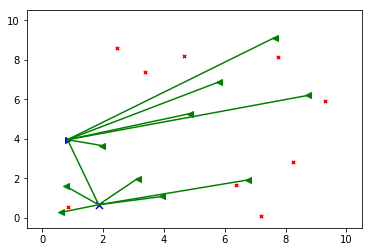

In [36]:
plt.axis([-0.5,10.5,-0.5,10.5])

for x in demand_points:
    plt.scatter(x.x, x.y,c="green",marker="<")
for x in facility_locations:
    if x.operational == 0:
        plt.scatter(x.x, x.y,c="red", marker="x",s=10)
    if x.operational == 1:
        print("yes")
        plt.scatter(x.x, x.y,c="blue", marker="x",s=50)
for x in supply_points:
    plt.scatter(x.x, x.y,c="blue", marker=">")

# plot allocation lines

for line in allocation_lines:
    plt.plot(line[[0,2]], line[[1,3]], c="green")

# plt.plot([0,4], [8,9])


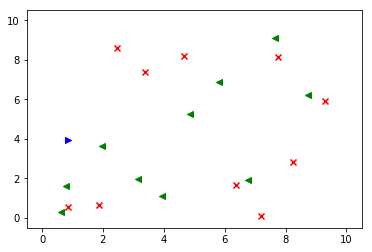

In [39]:
plt.axis([-0.5,10.5,-0.5,10.5])

for x in demand_points:
    plt.scatter(x.x, x.y,c="green",marker="<")
for x in facility_locations:
#     if x.operational == 1:
    plt.scatter(x.x, x.y,c="red", marker="x")
for x in supply_points:
    plt.scatter(x.x, x.y,c="blue", marker=">")


# EMA model evaluator



## Pseudocode
    
    Model:
        Input:
            FL Options: FL1,FL2,FL3, ..., FLn
            
            unit_opening_costs,
            unit_transport_cost,
            FL_range
            
            Coordinates of SP,FL,DP
            Demand at DPs
            
        Calculate:
            Distances
            allocate 
            Objectives:
                calculate costs
                calculate times
                calculate coverage
                calculate xxx
                
        Return Objectives, Constraints



## EMA pseudocode
    
    Sequence of analysis:
        Initialise case (input1,input2,input3) #demand_landscape, 
        Optimise (obj1,obj2,obj3)
        Check Robustness (unc1,unc2,unc3)
        Implement best option

        Change uncertainties based on new information due to new FL
            Do this by reducing uncertainty the most for demand points closer to their preferred DC

    Merge: info up, info down
    
    Define classes
    Generate case
        create locations
    Load EMA model
        specifies:
            demand landscape
            unit transport costs
            unit opening costs
            Max nr of FL to be opened
        calculates
            distances
            allocation
            demand (allocated) XX TODO
            objectives

In [12]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import ema_workbench as em
from ema_workbench import (Model, RealParameter, IntegerParameter, Constant, ScalarOutcome, ema_logging,
                           perform_experiments, Scenario, Policy)

In [13]:
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

## Model

### Define classes and Case settings

In [14]:
# Classes
class demand_class:
    """Demand points such as affected cities or villages"""

    def __init__(self, name, x, y, demand):
        self.name = "DP{}".format(name)
        self.type = "demand"
        self.x = x
        self.y = y
        self.location = (self.x, self.y)
        self.demand = demand


class supply_class:
    """Supply points such as airports or seaports"""

    def __init__(self, name, x, y, supply):
        self.name = "SP{}".format(name)
        self.type = "supply"
        self.x = x
        self.y = y
        self.location = (self.x, self.y)
        self.supply = supply
        self.operational = 1


class facility_class:
    """(Temporary) Distribution centers to distribute supply to demand"""

    def __init__(self, name, x, y):
        self.name = "FL{}".format(name)
        self.type = "facility"
        self.x = x
        self.y = y
        self.location = (self.x, self.y)
        self.operational = 0


# Case settings / Globals
# size_area = 10
# nr_demand_points = 10
# nr_supply_points = 1
# nr_optional_FL = 10

### Functions for Instantiating case and calculating objectives

In [17]:
# Instantiate case functions
# Instantiate model


# Create airport as a supply point
def create_supply_points(sup_xcors, sup_ycors, supply_at_sp=100):

    #TODO get a list with specific supply values for each point
    supply_at_sps = [supply_at_sp for i in range(len(sup_xcors))]

    supply_points = []
    for i in range(len(sup_xcors)):
        supply_points.append(
            supply_class(
                name=i,
                x=sup_xcors[i],
                y=sup_ycors[i],
                supply=supply_at_sps[i]))
    return supply_points


# Create demand points
def create_demand_points(dp_xcors, dp_ycors, demand_at_dp=10):

    demand_at_dps = [demand_at_dp for i in range(len(dp_xcors))]

    demand_points = []
    for i in range(len(dp_xcors)):
        demand_points.append(
            demand_class(
                name=i, x=dp_xcors[i], y=dp_ycors[i], demand=demand_at_dps[i]))
    return demand_points


# # Create possible facility locations
def create_facility_locations(fl_xcors, fl_ycors):

    facility_locations = []
    for i in range(len(fl_xcors)):
        facility_locations.append(
            facility_class(name=i, x=fl_xcors[i], y=fl_ycors[i]))
    return facility_locations


# Create matrix with all distances
def create_distance_matrix(all_nodes):
    """
    Creates a matrix with distances between all nodes
    Input: list of all nodes (objects)
    Output: Matrix with distances from [i,j]
    i,j = from, to
    Note: Matrix is symmetric: distances[i,j] = distances[j,i]
    Note: Distance to self ([i,i]) is 100 times larger than largest distance in matrix
    """
    distances = np.zeros([len(all_nodes), len(all_nodes)])

    def calculate_distance(x1, y1, x2, y2):
        dx = x1 - x2
        dy = y1 - y2
        return (dx**2 + dy**2)**0.5

    # calculate distance matrix
    for i in range(len(all_nodes)):  #For every row
        for j in range(len(all_nodes)):  #For every column
            distances[i, j] = calculate_distance(
                all_nodes[i].x, all_nodes[i].y, all_nodes[j].x, all_nodes[j].y)

    # set distance to self to big distance
    for i in range(len(distances)):
        distances[i, i] = distances.max() * 100

    return distances


# allocate each demand point to either a supply point or a facility location
def create_allocation_matrix(supply_points, demand_points, facility_locations,
                             distances, FL_range):
    """
    Returns an allocation matrix for [n,h]
    if [n,h] is 1: node n is allocated to supply hub h
    The full size of the matrix is n*n
    indexes are based on node.id
    
    Assumptions:
    All allocations are made based on the minimum distance
    Supply points are not allocated to other nodes, since they are supplied by upstream logistics, which is out of scope    
    """

    # list of all IDs for operational supply points and facility locations
    operational_hubs_id = [
        a.id for a in supply_points + facility_locations if a.operational == 1
    ]

    all_nodes = supply_points + facility_locations + demand_points
    #allocation matrix of all_nodes x all_nodes
    allocation_matrix = np.zeros([len(all_nodes), len(all_nodes)])

    # for each operational facility location:
    # we skip supply points, because we don't consider upstream logistics
    for fl in [fl for fl in facility_locations if fl.operational == 1]:
        # choose closest supply point (if multiple)           # XX is still necessary? not used here: (distance to iself is made very large while creating distance matrix)
        closest_i = np.argmin(
            [distances[sp_id, fl.id] for sp_id in [sp.id for sp in supply_points]])
        # allocate me to that supply point
        allocation_matrix[fl.id, operational_hubs_id[closest_i]] = 1

    # For each demand point
    for dp in demand_points:
        # Assumption: Each demand point gets 1 location allocated. If 2 locations have same distance, choose first
        # check which supply point or facility location is closest
        # closest = the index of the minimum distance of the list of distances between this demand point and all supply points
        closest_d = np.min(
            [distances[hub_id, dp.id] for hub_id in operational_hubs_id])
        closest_i = np.argmin(
            [distances[hub_id, dp.id] for hub_id in operational_hubs_id])

        # Set allocation 1 if j is closest to this demand point (or i)
        #i: demand point index, j: supply point index
        if closest_d < FL_range:
            allocation_matrix[dp.id, operational_hubs_id[closest_i]] = 1

    return allocation_matrix


def calc_costs(facility_locations, unit_opening_costs, unit_transport_cost,
               distances, allocation_matrix):
    # calc opening costs of facilities
    # assumption: supply point, i.e. airport, is already opened
    nr_opened_fl = sum([fl.operational for fl in facility_locations])
    total_opening_costs = nr_opened_fl * unit_opening_costs

    # Calc transportation costs
    total_distance = (allocation_matrix * distances).sum()
    transportation_costs = total_distance * unit_transport_cost

    # Calc social costs
    # TODO
    # Now social logistics costs is included in transportation cost

    return total_opening_costs + transportation_costs

In [18]:
# Functions for plotting
def plotting_create_allocation_lines(all_nodes, allocation_matrix):

    allocation_lines = np.zeros([len(all_nodes), 4])
    # creates matrix x1,y1,x2,y2
    for i, line in enumerate(zip(allocation_matrix)):
        if allocation_matrix[i].sum() == 0:
            continue
        allocation_lines[i, 0:2] = list(all_nodes[i].location)
        # Assumption: Only 1 location allocated # if changing: loop over list comprehension: [more than 0 allocated]
        allocation_lines[i, 2:4] = list((all_nodes)[np.argmax(line)].location)

    return allocation_lines


def plotting_plot_map(demand_points,
                      facility_locations,
                      supply_points,
                      allocation_lines=False):

    plt.axis([-0.5, 10.5, -0.5, 10.5])

    for x in demand_points:
        plt.scatter(x.x, x.y, c="green", marker="<")

    for x in facility_locations:
        if x.operational == 0:
            plt.scatter(x.x, x.y, c="red", marker="x", s=10)
        if x.operational == 1:
            plt.scatter(x.x, x.y, c="blue", marker="x", s=50)
    for x in supply_points:
        plt.scatter(x.x, x.y, c="blue", marker=">")

    # plot allocation lines
    if allocation_lines is not False:
        for line in allocation_lines:
            plt.plot(line[[0, 2]], line[[1, 3]], c="green")

    # plt.plot([0,4], [8,9])

In [21]:
def FL_model(unit_opening_costs,
             unit_transport_cost,
             graphical_representation=False,
             FL_range=2,
             **kwargs):

    #unpack kwargs
    keys = sorted(kwargs.keys())
    sp_xcors = [kwargs[x] for x in [k for k in keys if k[:3] == 'SPX']]
    sp_ycors = [kwargs[x] for x in [k for k in keys if k[:3] == 'SPY']]
    dp_xcors = [kwargs[x] for x in [k for k in keys if k[:3] == 'DPX']]
    dp_ycors = [kwargs[x] for x in [k for k in keys if k[:3] == 'DPY']]
    fl_xcors = [kwargs[x] for x in [k for k in keys if k[:3] == 'FLX']]
    fl_ycors = [kwargs[x] for x in [k for k in keys if k[:3] == 'FLY']]

    fl_operational = [kwargs[x] for x in [k for k in keys if k[:3] == 'FLO']]

    #TODO Assign demand to demand points
    dp_demand = [kwargs[x] for x in [k for k in keys if k[:3] == 'DPD']]

    # set up model

    supply_points = create_supply_points(sp_xcors, sp_ycors)
    demand_points = create_demand_points(dp_xcors, dp_ycors)
    facility_locations = create_facility_locations(fl_xcors, fl_ycors)

    # Organise all nodes and create distance matrix
    all_nodes = supply_points + facility_locations + demand_points
    # Give all nodes in model an identifier corresponding to position in matrix
    for i in range(len(all_nodes)):
        all_nodes[i].id = i

    # Check if things are right
    if len(facility_locations) != len(fl_operational):
        print("Length FL arrays not equal, FL_model:", len(facility_locations),
              len(fl_operational))

    # Set operational FLs from levers
    for i, fl in enumerate(facility_locations):
        fl.operational = fl_operational[i]

    distances = create_distance_matrix(all_nodes)
    allocation_matrix = create_allocation_matrix(
        supply_points, demand_points, facility_locations, distances, FL_range)

    # determine objectives
    total_costs = calc_costs(facility_locations, unit_opening_costs,
                             unit_transport_cost, distances, allocation_matrix)

    # give a graphical representation of instantiation and allocation
    if graphical_representation == True:
        allocation_lines = plotting_create_allocation_lines(
            all_nodes, allocation_matrix)

        plotting_plot_map(demand_points, facility_locations, supply_points,
                          allocation_lines)
        plt.show()

    return total_costs, sum([fl.operational for fl in facility_locations])

In [32]:
SPX = {"SPX{}".format(i): random.uniform(0,10) for i in range(1)}
SPY = {"SPY{}".format(i): random.uniform(0,10) for i in range(1)}
DPX = {"DPX{}".format(i): random.uniform(0,10) for i in range(5)}
DPY = {"DPY{}".format(i): random.uniform(0,10) for i in range(5)}
FLX = {"FLX{}".format(i): random.uniform(0,10) for i in range(6)}
FLY = {"FLY{}".format(i): random.uniform(0,10) for i in range(6)}

FLO={"FLO0":1,"FLO1":1,"FLO2":0,"FLO3":1,"FLO4":0,"FLO5":0}

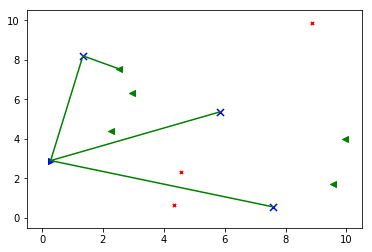

(320.52929538949127, 3)

In [33]:
FL_model(100, 1, True, **SPX, **SPY, **DPX,**DPY,**FLX,**FLY,**FLO)

In [2]:
# Meta parametric variables
nr_of_SPs = 1
nr_of_DPs = 10
nr_of_FLs = 6

#Instantiate EMA model
FL_EMAmodel = Model('flmodel', function=FL_model)

#Specify constants
FL_EMAmodel.constants = [
    Constant('unit_opening_costs', 100),
    Constant('unit_transport_cost', 1),
    Constant('graphical_representation', True)
]

#Specify coordinates of locations
# 0 - size area, range nr supply points
FL_EMAmodel.locations = [
    RealParameter("SPX{}".format(i), 0, 10) for i in range(nr_of_SPs)
] + [RealParameter("SPY{}".format(i), 0, 10) for i in range(nr_of_SPs)] + [
    RealParameter("DPX{}".format(i), 0, 10) for i in range(nr_of_DPs)
] + [RealParameter("DPY{}".format(i), 0, 10) for i in range(nr_of_DPs)] + [
    RealParameter("FLX{}".format(i), 0, 10) for i in range(nr_of_FLs)
] + [RealParameter("FLY{}".format(i), 0, 10) for i in range(nr_of_FLs)]

#Specify uncertainties
FL_EMAmodel.uncertainties = FL_EMAmodel.locations
#     RealParameter('FL_x_cor_0', 0, areasize),
#     RealParameter('FL_x_cor_1', 0, areasize),
#     RealParameter('FL_y_cor_0', 0, areasize),
#     RealParameter('FL_y_cor_1', 0, areasize),
#     RealParameter('x', 0, 1),
#     RealParameter('x', 0, 1)
# ]

# # Specify levers
# Facility Location Operational: [0,1]
FL_EMAmodel.levers = [
    IntegerParameter("FLO{}".format(i), 0, 1) for i in range(nr_of_FLs)
]

# FL_EMAmodel.c

# Specify outcomes
FL_EMAmodel.outcomes = [
    ScalarOutcome('Total_cost'),
    #     ScalarOutcome('message_string'),
    ScalarOutcome('operational_FL')
]

NameError: name 'Model' is not defined

In [32]:
IntegerParameter("test",0,1)

IntegerParameter('test', 0, 2)

{'FLO0': 0, 'FLO1': 0, 'FLO2': 0, 'FLO3': 0, 'FLO4': 0, 'FLO5': 0}

In [39]:
Policy("no_FLs",**{lever.name: 0 for lever in FL_EMAmodel.levers})

{'FLO0': 0, 'FLO1': 0, 'FLO2': 0, 'FLO3': 0, 'FLO4': 0, 'FLO5': 0}

In [16]:
from ema_workbench.em_framework import sample_levers

samples = sample_levers(FL_EMAmodel, 5)

for sample in samples:
    print(sample)


{'FLO0': 1, 'FLO1': 0, 'FLO2': 1, 'FLO3': 1, 'FLO4': 0, 'FLO5': 1}
{'FLO0': 1, 'FLO1': 0, 'FLO2': 0, 'FLO3': 0, 'FLO4': 1, 'FLO5': 0}
{'FLO0': 0, 'FLO1': 0, 'FLO2': 1, 'FLO3': 1, 'FLO4': 0, 'FLO5': 0}
{'FLO0': 0, 'FLO1': 1, 'FLO2': 1, 'FLO3': 0, 'FLO4': 1, 'FLO5': 1}
{'FLO0': 1, 'FLO1': 1, 'FLO2': 0, 'FLO3': 1, 'FLO4': 0, 'FLO5': 0}


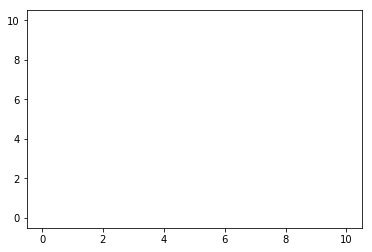

In [35]:
FL_EMAmodel.run_model(Scenario(), Policy({}))

In [113]:
random_scenario = Scenario(**{unc.name: random.uniform(0,10) for unc in FL_EMAmodel.uncertainties})

[MainProcess/INFO] performing 1 scenarios * 3 policies * 1 model(s) = 3 experiments
[MainProcess/INFO] performing experiments sequentially


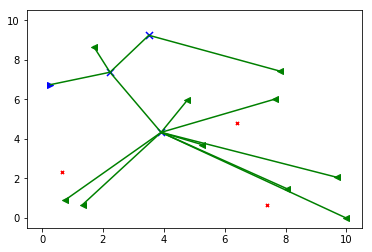

[MainProcess/INFO] 1 cases completed


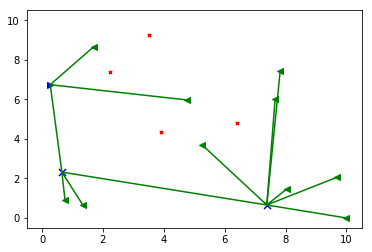

[MainProcess/INFO] 2 cases completed


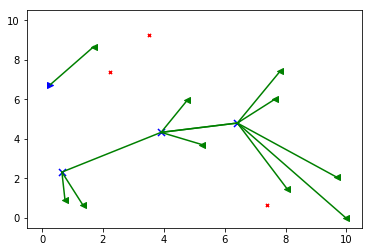

[MainProcess/INFO] 3 cases completed
[MainProcess/INFO] experiments finished


In [114]:
from ema_workbench import Policy, perform_experiments

policy_no = Policy("No_FLs",**{lever.name: 0 for lever in FL_EMAmodel.levers})
policy_all = Policy("All_FLs",**{lever.name: 1 for lever in FL_EMAmodel.levers})

results = perform_experiments(FL_EMAmodel, random_scenario,3)


experiments, outcomes = results

In [89]:
pd.DataFrame(experiments)#[["FLO0","FLO1","FLO2","FLO3"]]

,DPX0,DPX1,DPX2,DPX3,DPX4,DPX5,DPX6,DPX7,DPX8,DPX9,...,SPY0,FLO0,FLO1,FLO2,FLO3,FLO4,FLO5,scenario_id,policy,model
0,8.511881,3.216641,7.190886,5.747872,5.591575,5.096612,1.634270,8.165164,2.712119,5.784892,...,5.212050,0,0,0,0,0,0,70,1,flmodel
1,0.659520,9.540083,0.529086,0.895843,4.775754,3.536806,8.336866,2.628721,9.053414,4.874742,...,4.590406,0,0,0,0,0,0,71,1,flmodel


In [38]:
pd.DataFrame(outcomes)

,Total_cost,operational_FL
0,441.705585,4.0
1,428.372205,4.0
2,237.854518,2.0
3,234.220134,2.0


# Platypus optimisation

In [14]:
# imports
from platypus import NSGAII, Problem, Binary, Real, Integer

In [10]:
def FL_model(d_vars=None): # None to make compatible with EMA

    # set global operational FL
    for i in range(len(d_vars)):
        facility_locations[i].operational = d_vars[i]

    trans_costs = calc_transportation_costs(supply_points, demand_points,
                                      facility_locations, distances)

    costs = trans_costs #+ other costs
    
    objectives = [
        costs,
    ]
    constraints = [sum(d_vars),]

    return objectives, constraints

In [54]:
# nr of decision variables, number of objectives, number of constraints
problem = Problem(nr_optional_FL, 1, 1)

# Decision variables for possible facility locations
problem.types[:] = [Integer(0,1) for a in range(nr_optional_FL)]

# constraint: number of total operation FL
problem.constraints[:] = "=={}".format(max_nr_FL)
problem.function = FL_model

algorithm = NSGAII(problem)
algorithm.run(10000)

'==2'

In [17]:
from platypus import nondominated

In [55]:
a = nondominated (algorithm.result)

In [57]:
a

[Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.9886910101304

In [56]:
for i in a[0].objectives:
    print(i)

68.98869101013045


In [44]:
a[0].objectives[0]

33.50099827255527

In [46]:
set([i.objectives[0] for i in a])

{33.50099827255527}